In [1]:
import torch
import matplotlib.pyplot as plt

from torch import nn, optim
from sklearn.datasets import load_digits

In [2]:
torch.manual_seed(1)

device = 'cuda' if torch.cuda.is_available() else 'cpu'
if device == 'cuda':
    torch.cuda.manual_seed_all(1)

In [3]:
digits = load_digits()

X = digits.data # numpy.ndarray
Y = digits.target # numpy.ndarray

In [4]:
model = nn.Sequential(
    nn.Linear(64, 32),
    nn.ReLU(),
    nn.Linear(32, 16),
    nn.ReLU(),
    nn.Linear(16, 10)
)

In [5]:
X = torch.tensor(X, dtype=torch.float32)
Y = torch.tensor(Y, dtype=torch.int64)

In [6]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters())

In [7]:
losses = []

In [8]:
for epoch in range(101):
    
    optimizer.zero_grad()
    hypothesis = model(X)
    cost = criterion(hypothesis, Y)
    cost.backward()
    optimizer.step()
    
    if epoch % 10 == 0:
        print('Epoch {:03d}/{} Cost {:.6f}'.format(
            epoch, 100, cost.item()
        ))
        
    losses.append(cost.item())

Epoch 000/100 Cost 2.441051
Epoch 010/100 Cost 2.105998
Epoch 020/100 Cost 1.857256
Epoch 030/100 Cost 1.575444
Epoch 040/100 Cost 1.275133
Epoch 050/100 Cost 0.972322
Epoch 060/100 Cost 0.707070
Epoch 070/100 Cost 0.519495
Epoch 080/100 Cost 0.401950
Epoch 090/100 Cost 0.320815
Epoch 100/100 Cost 0.259788


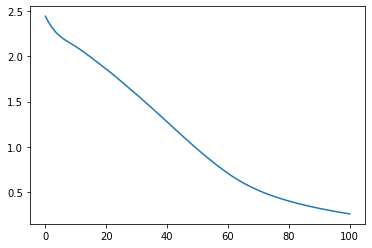

In [9]:
plt.plot(losses)
plt.show()